In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

%matplotlib inline

In [47]:
class K_Mean:
    def __init__(self, X, K):
        """
        X: input with shape NxM
        K: number of cluster
        """
        
        self.X = X
        self.labels = []
        self.centers = []
        self.K = K
        
    def fit(self):
        # random center points         
        random_centers = self.X[np.random.choice(self.X.shape[0], self.K)]
        self.centers.append(random_centers)
        
        while True:
            # calc dist between all points and all centers
            pair_distance = cdist(self.X, self.centers[-1], 'euclidean')
            # calc cluster's index for each point
            self.labels = np.argmin(pair_distance, axis=1)
            
            # calc new centers for each cluster
            new_centers = np.zeros((self.K, self.X.shape[1]))
            for k in range(self.K):
                k_th_points = self.X[self.labels == k, :]
                k_th_center = np.mean(k_th_points, axis=0)
                new_centers[k, :] = k_th_center
            
            # compare with previous center, if coveraged then break 
            if (np.sort(new_centers) == np.sort(self.centers[-1])).all():
                break
            
            self.centers.append(new_centers)
            
    def plot_result(self):
        colors = ['red', 'blue', 'green']
        centroid_colors = ['black', 'yellow', 'aqua']
        
        for k in range(self.K):
            k_th_points = self.X[self.labels == k, :]
            k_th_center = self.centers[-1][k]
            
            plt.scatter(k_th_points[:, 0], k_th_points[:, 1], color=np.random.rand(3,), alpha=0.6)
            plt.scatter(k_th_center[0], k_th_center[1], s=500, marker='*',color=np.random.rand(3,), label=f'{k}')

        plt.title(f"K-mean with {self.K} cluster")
        plt.legend()
        plt.show()

In [42]:
from sklearn import datasets

In [43]:
iris = datasets.load_iris().data

In [44]:
iris_x = iris[:, :2]

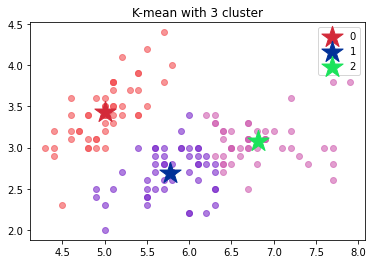

In [50]:
iris_kmean = K_Mean(iris_x, 3)
iris_kmean.fit()
iris_kmean.plot_result()